# Analiza zbioru danych dotyczącego cen smartfonów

Projekt ten ma na celu przeprowadzenie analizy eksploracyjnej oraz wykonanie regresji liniowej na zbiorze danych dotyczących smartfonów.

Link do zbioru: https://www.kaggle.com/datasets/swahajraza/a-dataset-of-smartphone-specifications-and-prices

# Analiza zbioru

## Import bibliotek

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## Wczytanie zbioru

In [3]:
df = pd.read_csv('smartphone_specifications_and_prices.csv')

df

brand_name                 model        display front_camera  \
0       SAMSUNG     Samsung S24 Ultra   6.8" (120Hz)         40MP   
1       SAMSUNG      Samsung S24 Plus   6.6" (120Hz)         10MP   
2       SAMSUNG          Samsung Zero  6.41" (120Hz)        32 MP   
3       SAMSUNG           Samsung S24   6.1" (120Hz)         10MP   
4       SAMSUNG          Samsung A05s    6.5" (90Hz)          5MP   
...         ...                   ...            ...          ...   
1251       OPPO              Oppo A37           5.0"         5 MP   
1252       OPPO               Oppo F1           5.0"         8 MP   
1253       OPPO              Oppo A31           4.5"         5 MP   
1254       OPPO        Oppo Reno 4 SE          6.43"        32 MP   
1255       OPPO  Oppo Reno 4 SE 256GB          6.43"        32 MP   

                     rare_camera          processor battery_capacity  ram  \
0     108MP + 10MP + 10MP + 12MP            Exynos          5000 mAh 8.00   
1             50MP + 10MP + 12MP            Exynos          4500 mAh 8.00   
2           12 MP + 8 MP + 12 MP  Snapdragon 888 5G         4500 mAh 8.00   
3             50MP + 10MP + 12MP            Exynos          3700 mAh 8.00   
4               50MP + 2MP + 2MP            Exynos          5000 mAh 4.00   
...                          ...                ...              ...  ...   
1251                        8 MP     Snapdragon 410          2630mAh 2.00   
1252                       13 MP     Snapdragon 616                - 3.00   
1253                        8 MP     Snapdragon 410          2000mAh 1.00   
1254         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh 8.00   
1255         48 MP + 8 MP + 2 MP      Dimensity 720          4300mAh 8.00   

      internal_storage      price  
0                  128 334,999.00  
1                  128 189,999.00  
2                  256 112,999.00  
3                  128 249,999.00  
4                   64  24,999.00  
...                ...        ...  
1251                16  88,415.00  
1252                16  35,999.00  
1253                 8  88,415.00  
1254               128  88,415.00  
1255               256  88,415.00  

[1256 rows x 10 columns]

## Dodanie atrybutu 'score' poprzez połączenie ze zbiorem danych

Atrybut *score* opsiuje ogólną ocenę procesora, ze strony https://nanoreview.net/en/soc-list/rating

In [4]:
dd = pd.read_csv('../web-scraping/extra_data.csv')

pd.merge(df, dd, on = 'processor')

brand_name                 model      display front_camera  \
0      SAMSUNG           Samsung A54  6.5" (90Hz)        32 MP   
1      SAMSUNG     Samsung A54 256GB  6.5" (90Hz)        32 MP   
2      SAMSUNG           Samsung A73  6.7" (90Hz)        32 MP   
3       XIAOMI           Poco M2 Pro        6.67"        16 MP   
4       XIAOMI   Poco M2 Pro 6GB Ram        6.67"        16 MP   
..         ...                   ...          ...          ...   
206       OPPO          Oppo A5 2020         6.5"         8 MP   
207       OPPO  Oppo A5 2020 4GB Ram         6.5"         8 MP   
208       OPPO          Oppo A9 2020         6.5"        16 MP   
209       OPPO        Oppo Reno 4 SE        6.43"        32 MP   
210       OPPO  Oppo Reno 4 SE 256GB        6.43"        32 MP   

                        rare_camera        processor battery_capacity  ram  \
0    64 MP + 12 MP + 1125 MP + 5 MP  Snapdragon 720G         4500 mAh 8.00   
1    64 MP + 12 MP + 1125 MP + 5 MP  Snapdragon 720G         4500 mAh 8.00   
2           108MP + 8MP + 2MP + 2MP  Snapdragon 720G         5000 mAh 8.00   
3        48 MP + 8 MP + 5 MP + 2 MP  Snapdragon 720G          5000mAh 4.00   
4        48 MP + 8 MP + 5 MP + 2 MP  Snapdragon 720G          5000mAh 6.00   
..                              ...              ...              ...  ...   
206      12 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh 3.00   
207      12 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh 4.00   
208      48 MP + 8 MP + 2 MP + 2 MP   Snapdragon 665          5000mAh 8.00   
209             48 MP + 8 MP + 2 MP    Dimensity 720          4300mAh 8.00   
210             48 MP + 8 MP + 2 MP    Dimensity 720          4300mAh 8.00   

     internal_storage     price  score  
0                 128 59,999.00     38  
1                 256 65,999.00     38  
2                 128 67,999.00     38  
3                  64 31,999.00     38  
4                 128 37,999.00     38  
..                ...       ...    ...  
206                64 27,999.00     28  
207                64 31,999.00     28  
208               128 37,999.00     28  
209               128 88,415.00     37  
210               256 88,415.00     37  

[211 rows x 11 columns]

## Usunięcie błędów w danych

In [5]:
df.loc[df.model.isin(['iPhone 14', 'iPhone 14 128GB', 'iPhone 14 256GB']), 'processor'] = 'A15 Bionic'
df.loc[df.model == 'iPhone 15 Plus', 'price'] = 349999
df.loc[df.model == 'iPhone 15 Pro', 'battery_capacity'] = '3274'
df.loc[df.model == 'iPhone 15 Pro', 'internal_storage'] = 256
df.loc[df.model.str.contains('Samsung S23'), 'processor'] = 'Snapdragon 8 Gen 2'

Jak można zauważyć, usunęło to bardzo dużą ilość danych. Głównie przez braki w tych danych lub kompatybilność zbioru danych z pliku extra_data.csv z rozważanym zbiorem.

## Poprawienie kompatybilności danych

In [6]:
def get_rid_of_5G(s):
    '''
    funkcja usuwa z ciągu znaków znaki ' 5G'
    '''
    if '5G' in s:
        if '+ 5G' in s:
            return s.replace('+ 5G', '')
        else: 
            return s.replace(' 5G', '')
    return s

df['processor'] = df['processor'].astype(str)
# print(df.dtypes)
df['processor'] = df['processor'].apply(get_rid_of_5G)

Naprawienie problemu z nazwą 'Apple Bionic Ax' , gdzie x > 11, ponieważ w nazwach procesora występują nazwy 'Bionic Ax'.

In [7]:
def get_rid_of_Apple_in_processor_name(s):
    words = s.split(' ')
    if len(words) > 2 & ('Apple' in words):
        return s.replace('Apple ', '')
    else:
        return s
    
df['processor'] = df['processor'].apply(get_rid_of_Apple_in_processor_name)

Zamiana znaku '+' na 'Plus' - ze względu na sposób zapisu w zbiorze ze statystykimi procesorów

In [8]:
def get_rid_of_plus_sign(s):
    return s.replace('+', ' Plus')

df['processor'] = df['processor'].apply(get_rid_of_plus_sign)

Usunięcie powtarzających się 2 razy nazwy producenta procesora MediaTek

In [9]:
def replace_Mediatek_with_helio(s):
    if 'MediaTek' in s:
        if ('P' in s or 'G' in s) and not 'Helio' in s:
            return s.replace('MediaTek', 'Helio')
        return s.replace('MediaTek', '')
    if 'Mediatek' in s:
        if ('P' in s or 'G' in s) and not 'Helio' in s:
            return s.replace('Mediatek', 'Helio')
        return s.replace('Mediatek', '')
    return s

df['processor'] = df['processor'].apply(replace_Mediatek_with_helio)

In [10]:
def replace_Gen1_with_Gen_1(s):
    return s.replace('Gen1', 'Gen 1')

df['processor'] = df['processor'].apply(replace_Gen1_with_Gen_1)

In [11]:
def return_for_iPhone_12(s):
    if s == 'A14':
        return 'A14 Bionic'
    return s

df['processor'] = df['processor'].apply(return_for_iPhone_12)

Ustawienie procesorów dla konkretnych telefonów

In [12]:
def set_processor_for_iPhones(row):
    if 'iPhone 15 Pro' in row['model']:
        return 'A17 Pro'
    elif 'iPhone 15' in row['model']:
        return 'A16 Bionic'
    elif 'iPhone 6s' in row['model']:
        return 'Apple A9'
    elif row['model'] in ['iPhone SE', 'iPhone SE 32GB', 'iPhone SE 64GB', 'iPhone SE 128GB']:
        return 'Apple A9'
    return row['processor']

df['processor'] = df.apply(set_processor_for_iPhones, axis = 1)

Usunięcie wyrazu, który zaczyna się na MT

In [13]:
df['processor'] = df['processor'].replace(r'\bMT\w*\b', '', regex = True)

In [14]:
def get_rid_of_last_first_space(s):
    return s.strip();

df['processor'] = df['processor'].apply(get_rid_of_last_first_space)

In [15]:
def get_rid_of_octa(s):
    if 'Octa' in s:
        return s.replace(' Octa', '')
    return s

df['processor'] = df['processor'].apply(get_rid_of_octa)

In [16]:
def add_G_to_snapdragon_750(s):
    if s == 'Snapdragon 750':
        return s+'G'
    return s

df['processor'] = df['processor'].apply(add_G_to_snapdragon_750)

Sprawdzenie jakie rezultaty daje teraz scalanie

In [17]:
df = pd.merge(df, dd, how = 'left', on = 'processor')
#print(dg[dg['brand_name'] == 'APPLE'])
print("Obiektów przed scaleniem: ", len(df))

df = df.dropna(how = "any")
print("Obiektów po scaleniu: ", len(df))


Obiektów przed scaleniem:  1256
Obiektów po scaleniu:  974


In [18]:
df.to_csv('good_data.csv', index = False)

## Oczyszczanie danych

Usunięcie nieprawidłowych rekordów

In [19]:
i = df[df.model == 'iPhone SE 4'].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 14 Mini')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 12 Flip')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone Flip')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone SE Plus')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone SE 3')].index
df = df.drop(i)

i = df[df.model.str.contains('iPhone 12s')].index
df = df.drop(i)

Zamiana atrybutu opisowego *rear_camera* na atrybuty ilościowe. Rozdzielenie atrybututu *rear_camera* na *main_camera* - główny obiektyw, *sum_MP* - sumę megapikseli matryc, i *num_cameras* - liczbę obiektywów.

In [20]:
def count_integers(s):
    '''
    funkcja zwraca ilość wystąpień cyfr <= 200
    w ciągu oraz ich sumę liczb <= 200
    '''
    # rozdziel ciąg znaków na liczby
    words = re.findall(r'\d+', s)
    # znajdź błędy w danych (> 200 MP)
    i = 0
    sum = 0
    for w in words:
        if int(w) > 200:                # ze względu na błędy w danych
            i = i - 1
        else:
            sum = sum + int(w)
    # zlicz słowa, które są liczbami
    ret = len(words) + i
    return pd.Series([ret, sum])

Warunek, na cyfry wartość <=200 wynika z błędów danych, gdzie niektóre z kamer zostały źle przepisane

In [21]:
df[['num_cameras', 'sum_MP']] = df['rare_camera'].apply(count_integers)

Dodanie atrybutów *front_camera* - ilość megapikseli w kamerze w ekranie i *main_camera* - ilość megapikseli w głownej tylnej kamerze. W danych są one podawane jako pierwsze, w przypadku kamera z przodu najczęściej występuje jedna.

In [22]:
def find_first_number(s):
    ''' 
    funkcja zwraca pierwszą napotkaną liczbę
    w ciągu znaków
    '''
    words = re.findall(r'\d+', s)
    if len(words) > 0:
        return words[0]
    else:
        return 0

In [23]:
df['front_camera'] = df['front_camera'].apply(find_first_number)
df['main_camera']  = df['rare_camera'].apply(find_first_number)

df[['front_camera', 'main_camera']] = df[['front_camera', 'main_camera']].apply(pd.to_numeric)

# nie potrzebny już atrybut
df = df.drop(columns = 'rare_camera')

Usunięcie tabletów ze zbioru danych:

In [24]:
df = df[~df['model'].str.contains('Pad|Tab', na=False)]

Usunięcie kolumn, które nie posiadały żadnych zgodnych liczb

In [25]:
df = df[df.front_camera != 0]
df = df[df.sum_MP != 0]
df = df[df.main_camera != 0]

Obrobienie wartości pojemności baterii - tylko te rekordy, które zawierają 4 cyfrową liczbę. Jest tak, ponieważ pojemności baterii zwyczajowo dla smartfonów podaje się w tysiącach mAh, pozostałe wartości, albo są nie podane, albo są podane w Wh i dotyczą tabletów

In [26]:
df = df[(df['battery_capacity'].str.contains(pat = '\d\d\d\d', regex= True))]

df['battery_capacity'] = pd.to_numeric(df['battery_capacity'].str[-8:-3])

print("Liczba obiektów:", df.shape[0])

Liczba obiektów: 936


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_1616\4251574446.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = df[(df['battery_capacity'].str.contains(pat = '\d\d\d\d', regex= True))]


Rozdzielenie atrybutu 'display' na rozmiar ekranu i jego częstotliwość odświeżania. Jeżeli częstotliwość nie została podana przyjmuje się wartość 60.

In [27]:
# atrybut 'display' ma wartości podane w formie: <liczba>" <ew. odświeżanie ekranu>
df[['screen_size', 'refresh_rate']] = pd.DataFrame(df['display'].str.split('"').tolist(), index = df.index)
df = df.drop(columns = 'display')

df['refresh_rate'] = df['refresh_rate'].apply(lambda x: '60' if x == ''  else x[2:-3])

Dodanie kolumny z oceną procesora pozbyło się co najmiej kilkadziesiąt rekordów, lecz pomogło to w pewien sposób ujednolicić zbiór do aktualnych specyfikacji smartfonów poprzez wyeliminowanie tych, które są za stare.

## Dodanie smartfonów do bazy

In [28]:
df.loc[-1] = ['APPLE', 'iPhone 14 Plus', 12, 'A15 Bionic', 4323, 6, 128, 199999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 14 Plus 256GB', 12, 'A15 Bionic', 4323, 6, 256, 209999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 14 Plus 512GB', 12, 'A15 Bionic', 4323, 6, 512, 219999, 89, 2, 24, 12, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 256GB', 12, 'A16 Bionic', 3349, 6, 256, 349999, 94, 2, 60, 48, 6.1, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 512GB', 12, 'A16 Bionic', 3349, 6, 512, 399999, 94, 2, 60, 48, 6.1, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Plus 256GB', 12, 'A16 Bionic', 4383, 6, 256, 379999, 94, 2, 60, 48, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Plus 512GB', 12, 'A16 Bionic', 4383, 6, 512, 439999, 94, 2, 60, 48, 6.7, '60']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 256GB', 12, 'A17 Pro', 3274, 8, 256, 429999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 512GB', 12, 'A17 Pro', 3274, 8, 512, 485999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro 1TB', 12, 'A17 Pro', 3274, 8, 1024, 539999, 94, 3, 72, 48, 6.1, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro Max 1TB', 12, 'A17 Pro', 4441, 8, 1024, 555999, 94, 3, 72, 48, 6.7, '120']
df.index = df.index + 1
df = df.sort_index()

df.loc[-1] = ['APPLE', 'iPhone 15 Pro Max 512GB', 12, 'A17 Pro', 4441, 8, 1024, 495999, 94, 3, 72, 48, 6.7, '120']
df.index = df.index + 1
df = df.sort_index()

## Podstawowe statystyki danych

In [29]:
print("Liczba obiektów:", df.shape[0])
marki = df['brand_name'].unique()
print("Liczba marek:", marki.shape[0])
for i in list(marki):
    print("Obiektów marki", i, ": ", len(df[df['brand_name'] == i]))
print("Liczba atrybutów:", df.shape[1])
print("Ilość braków:", df.isnull().sum().sum())

Liczba obiektów: 948
Liczba marek: 5
Obiektów marki APPLE :  91
Obiektów marki SAMSUNG :  256
Obiektów marki XIAOMI :  353
Obiektów marki ONEPLUS :  71
Obiektów marki OPPO :  177
Liczba atrybutów: 14
Ilość braków: 0


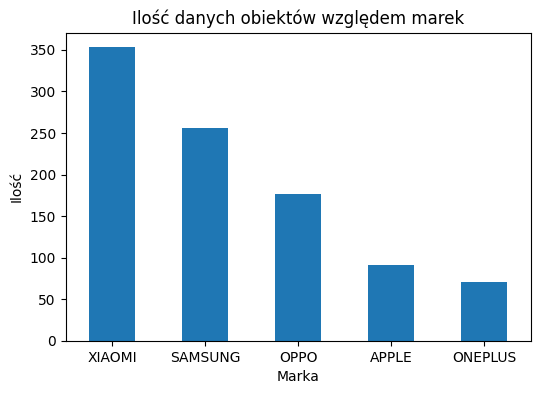

In [30]:
plt.figure(figsize=(6, 4))
df['brand_name'].value_counts().sort_values(ascending = 0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów względem marek', fontsize = 12)
plt.xlabel('Marka', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Zbiór posiada 5 producentów smartfonów oraz nie posiada braków. Większość obiektów (smartfonów) jest marki XIAOMI. Jednocześnie każdy smartfon posiada 11 atrybutów ilościowych: 
* pamięć wewnętrzną - *internal_storage* 
* pamięć RAM - *ram*
* wielkość przekątnej ekranu - *screen_size*
* odświeżanie ekranu - *refresh_rate**
* pojemność baterii - *battery* 
* cenę - *price*
* punktację procesora (od 11 do 100) - *score*
* liczba obiektów (znajdujących się z tyłu) - *num_cameras*
* suma megapikseli kamer (znajdujących się z tyłu) - *sum_MP*
* liczba megapikseli kamery frontowej - *front_camera*
* liczba megapikseli kamery z tyłu - *main_camera*

*odświeżanie ekranu może być potraktowane jako atrybut kategoryczny porządkowy, ponieważ wartości odświeżania ekranu zwykle przyjmują wartości 60, 90, 120 Hz

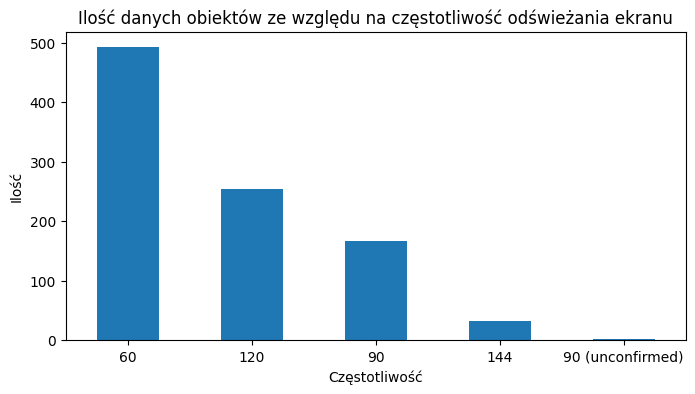

In [31]:
plt.figure(figsize=(8, 4))
df['refresh_rate'].value_counts().sort_values(ascending = 0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

Pozbycie się informacji '(unconfirmed)'

In [32]:
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: x[:2] if '(' in x  else x)

df[['screen_size', 'refresh_rate']] = df[['screen_size', 'refresh_rate']].apply(pd.to_numeric)

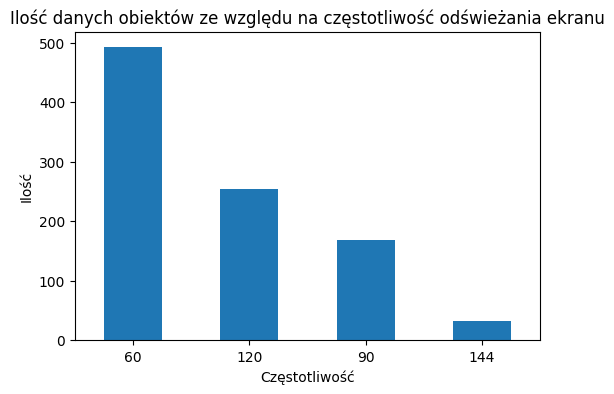

In [33]:
plt.figure(figsize=(6, 4))
df['refresh_rate'].value_counts().sort_values(ascending=0).plot(kind='bar', rot = 0)
plt.title('Ilość danych obiektów ze względu na częstotliwość odświeżania ekranu', fontsize = 12)
plt.xlabel('Częstotliwość', fontsize=10)
plt.ylabel('Ilość', fontsize=10)
plt.show()

## Wykresy pudełkowe i skrzypcowe dla danych

In [34]:
# zresetowanie indeksów
df = df.reset_index()
df = df.drop(columns = ['index'])     # usunięcie starego indeksowania

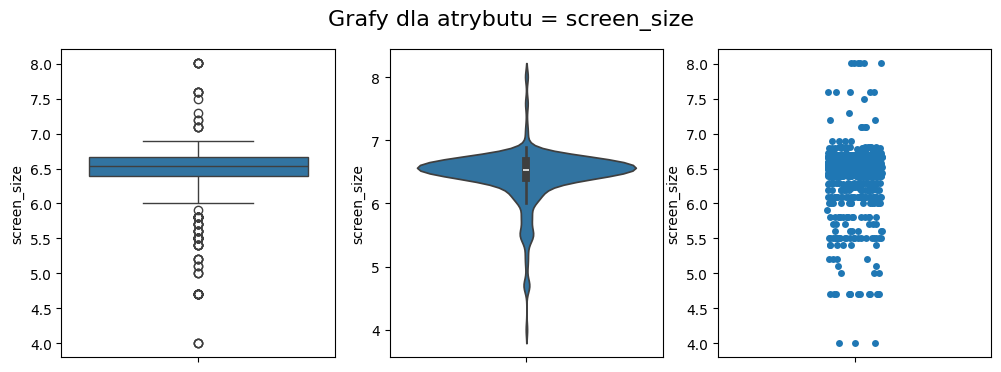

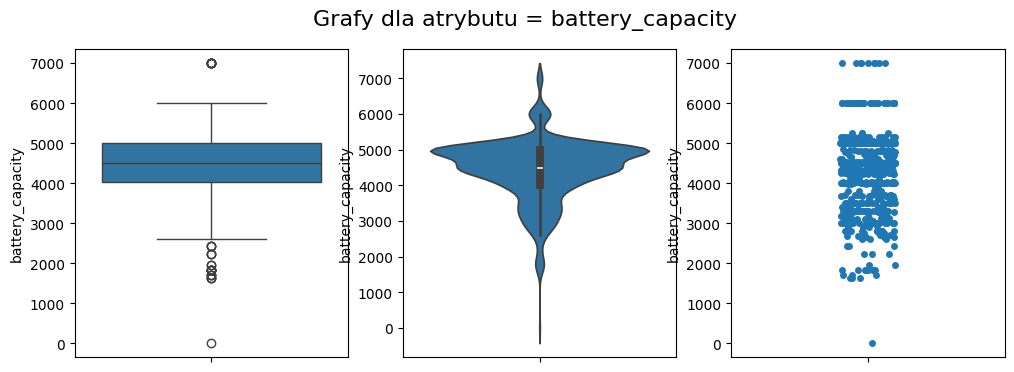

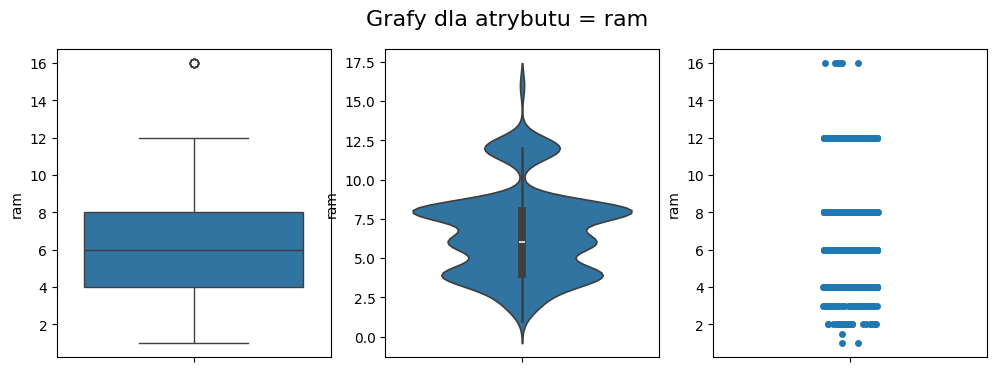

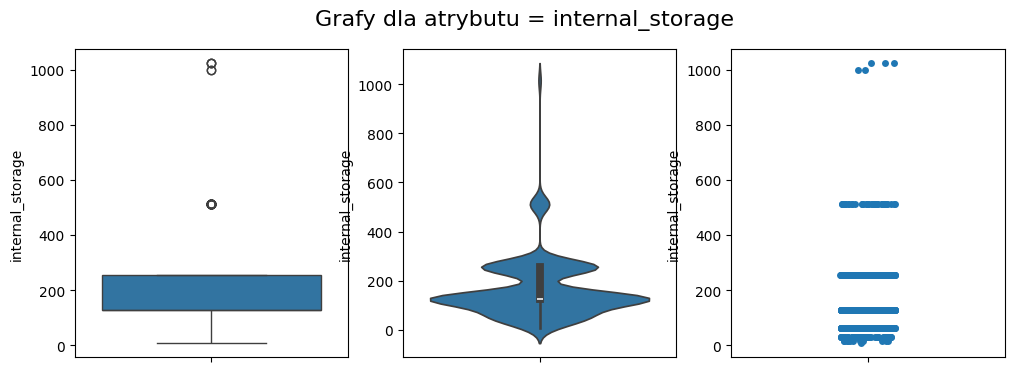

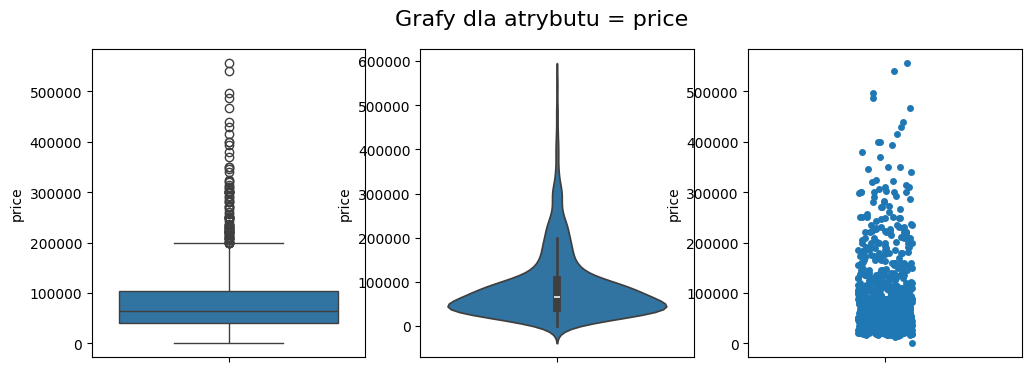

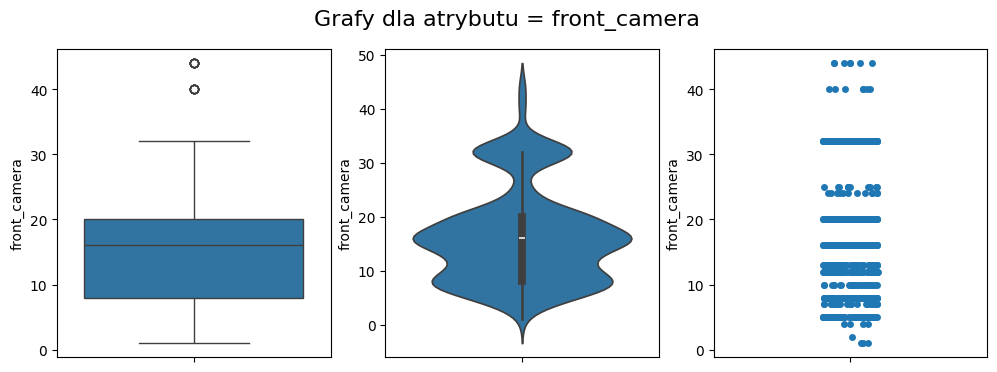

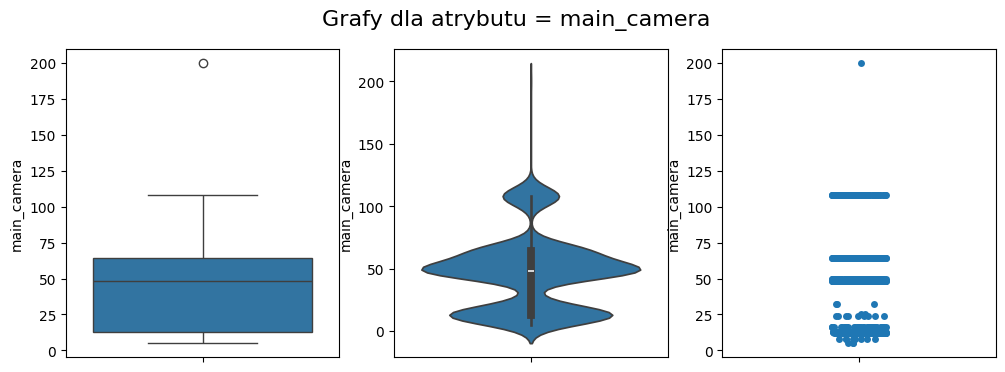

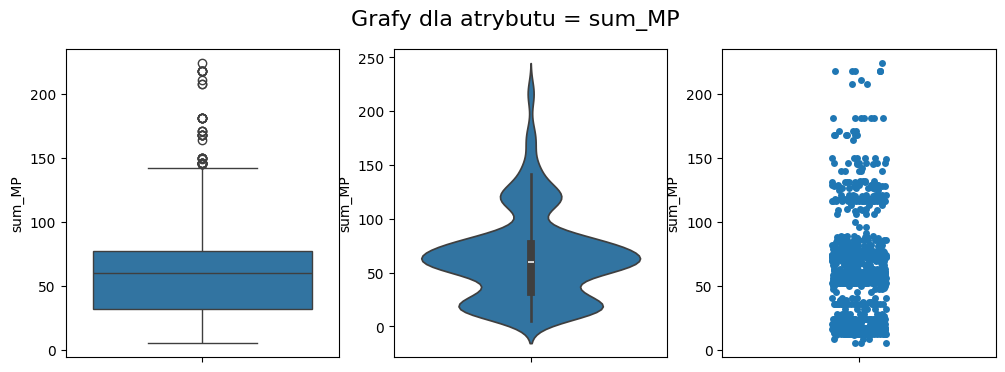

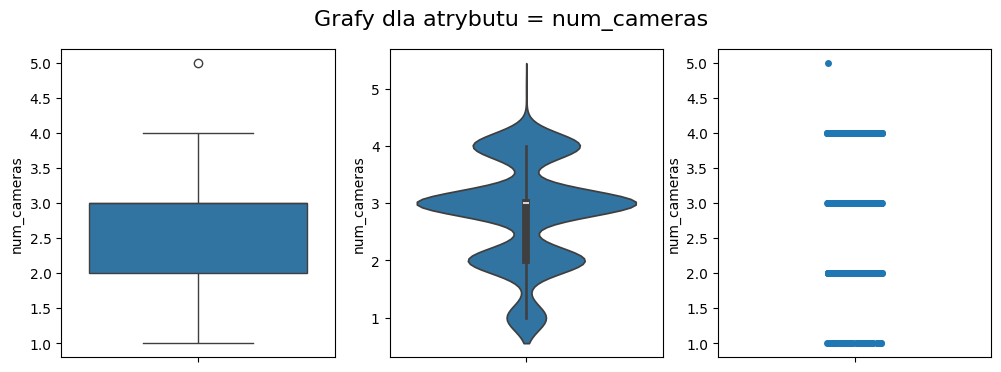

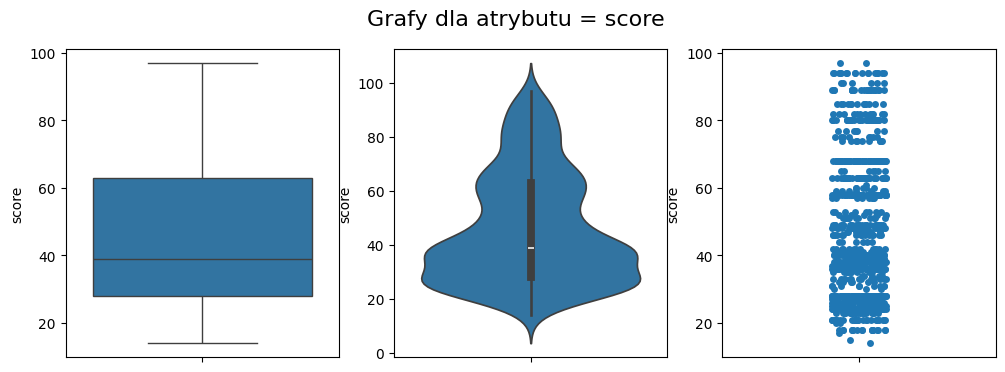

In [35]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df[attr]

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary

In [36]:
description = df.describe()
description

front_camera  battery_capacity    ram  internal_storage      price  \
count        948.00            948.00 948.00            948.00     948.00   
mean          16.35          4,461.77   6.66            163.49  89,663.81   
std            8.71            841.96   2.80            121.31  77,488.25   
min            1.00              3.00   1.00              8.00     399.00   
25%            8.00          4,020.00   4.00            128.00  39,999.00   
50%           16.00          4,500.00   6.00            128.00  64,999.00   
75%           20.00          5,000.00   8.00            256.00 103,499.00   
max           44.00          7,000.00  16.00          1,024.00 555,999.00   

       score  num_cameras  sum_MP  main_camera  screen_size  refresh_rate  
count 948.00       948.00  948.00       948.00       948.00        948.00  
mean   46.03         2.82   64.14        46.61         6.44         84.26  
std    20.46         0.87   40.36        28.94         0.42         27.85  
min    14.00         1.00    5.00         5.00         4.00         60.00  
25%    28.00         2.00   32.00        13.00         6.40         60.00  
50%    39.00         3.00   60.00        48.00         6.53         60.00  
75%    63.00         3.00   77.00        64.00         6.67        120.00  
max    97.00         5.00  224.00       200.00         8.01        144.00

Zmienność atrybutów

In [37]:
def calculate_coefficient_variation(column):
    return column['std']/column['mean']

description.apply(calculate_coefficient_variation, axis = 0)

front_camera       0.53
battery_capacity   0.19
ram                0.42
internal_storage   0.74
price              0.86
score              0.44
num_cameras        0.31
sum_MP             0.63
main_camera        0.62
screen_size        0.07
refresh_rate       0.33
dtype: float64

## Macierz wykresów atrybutów danych

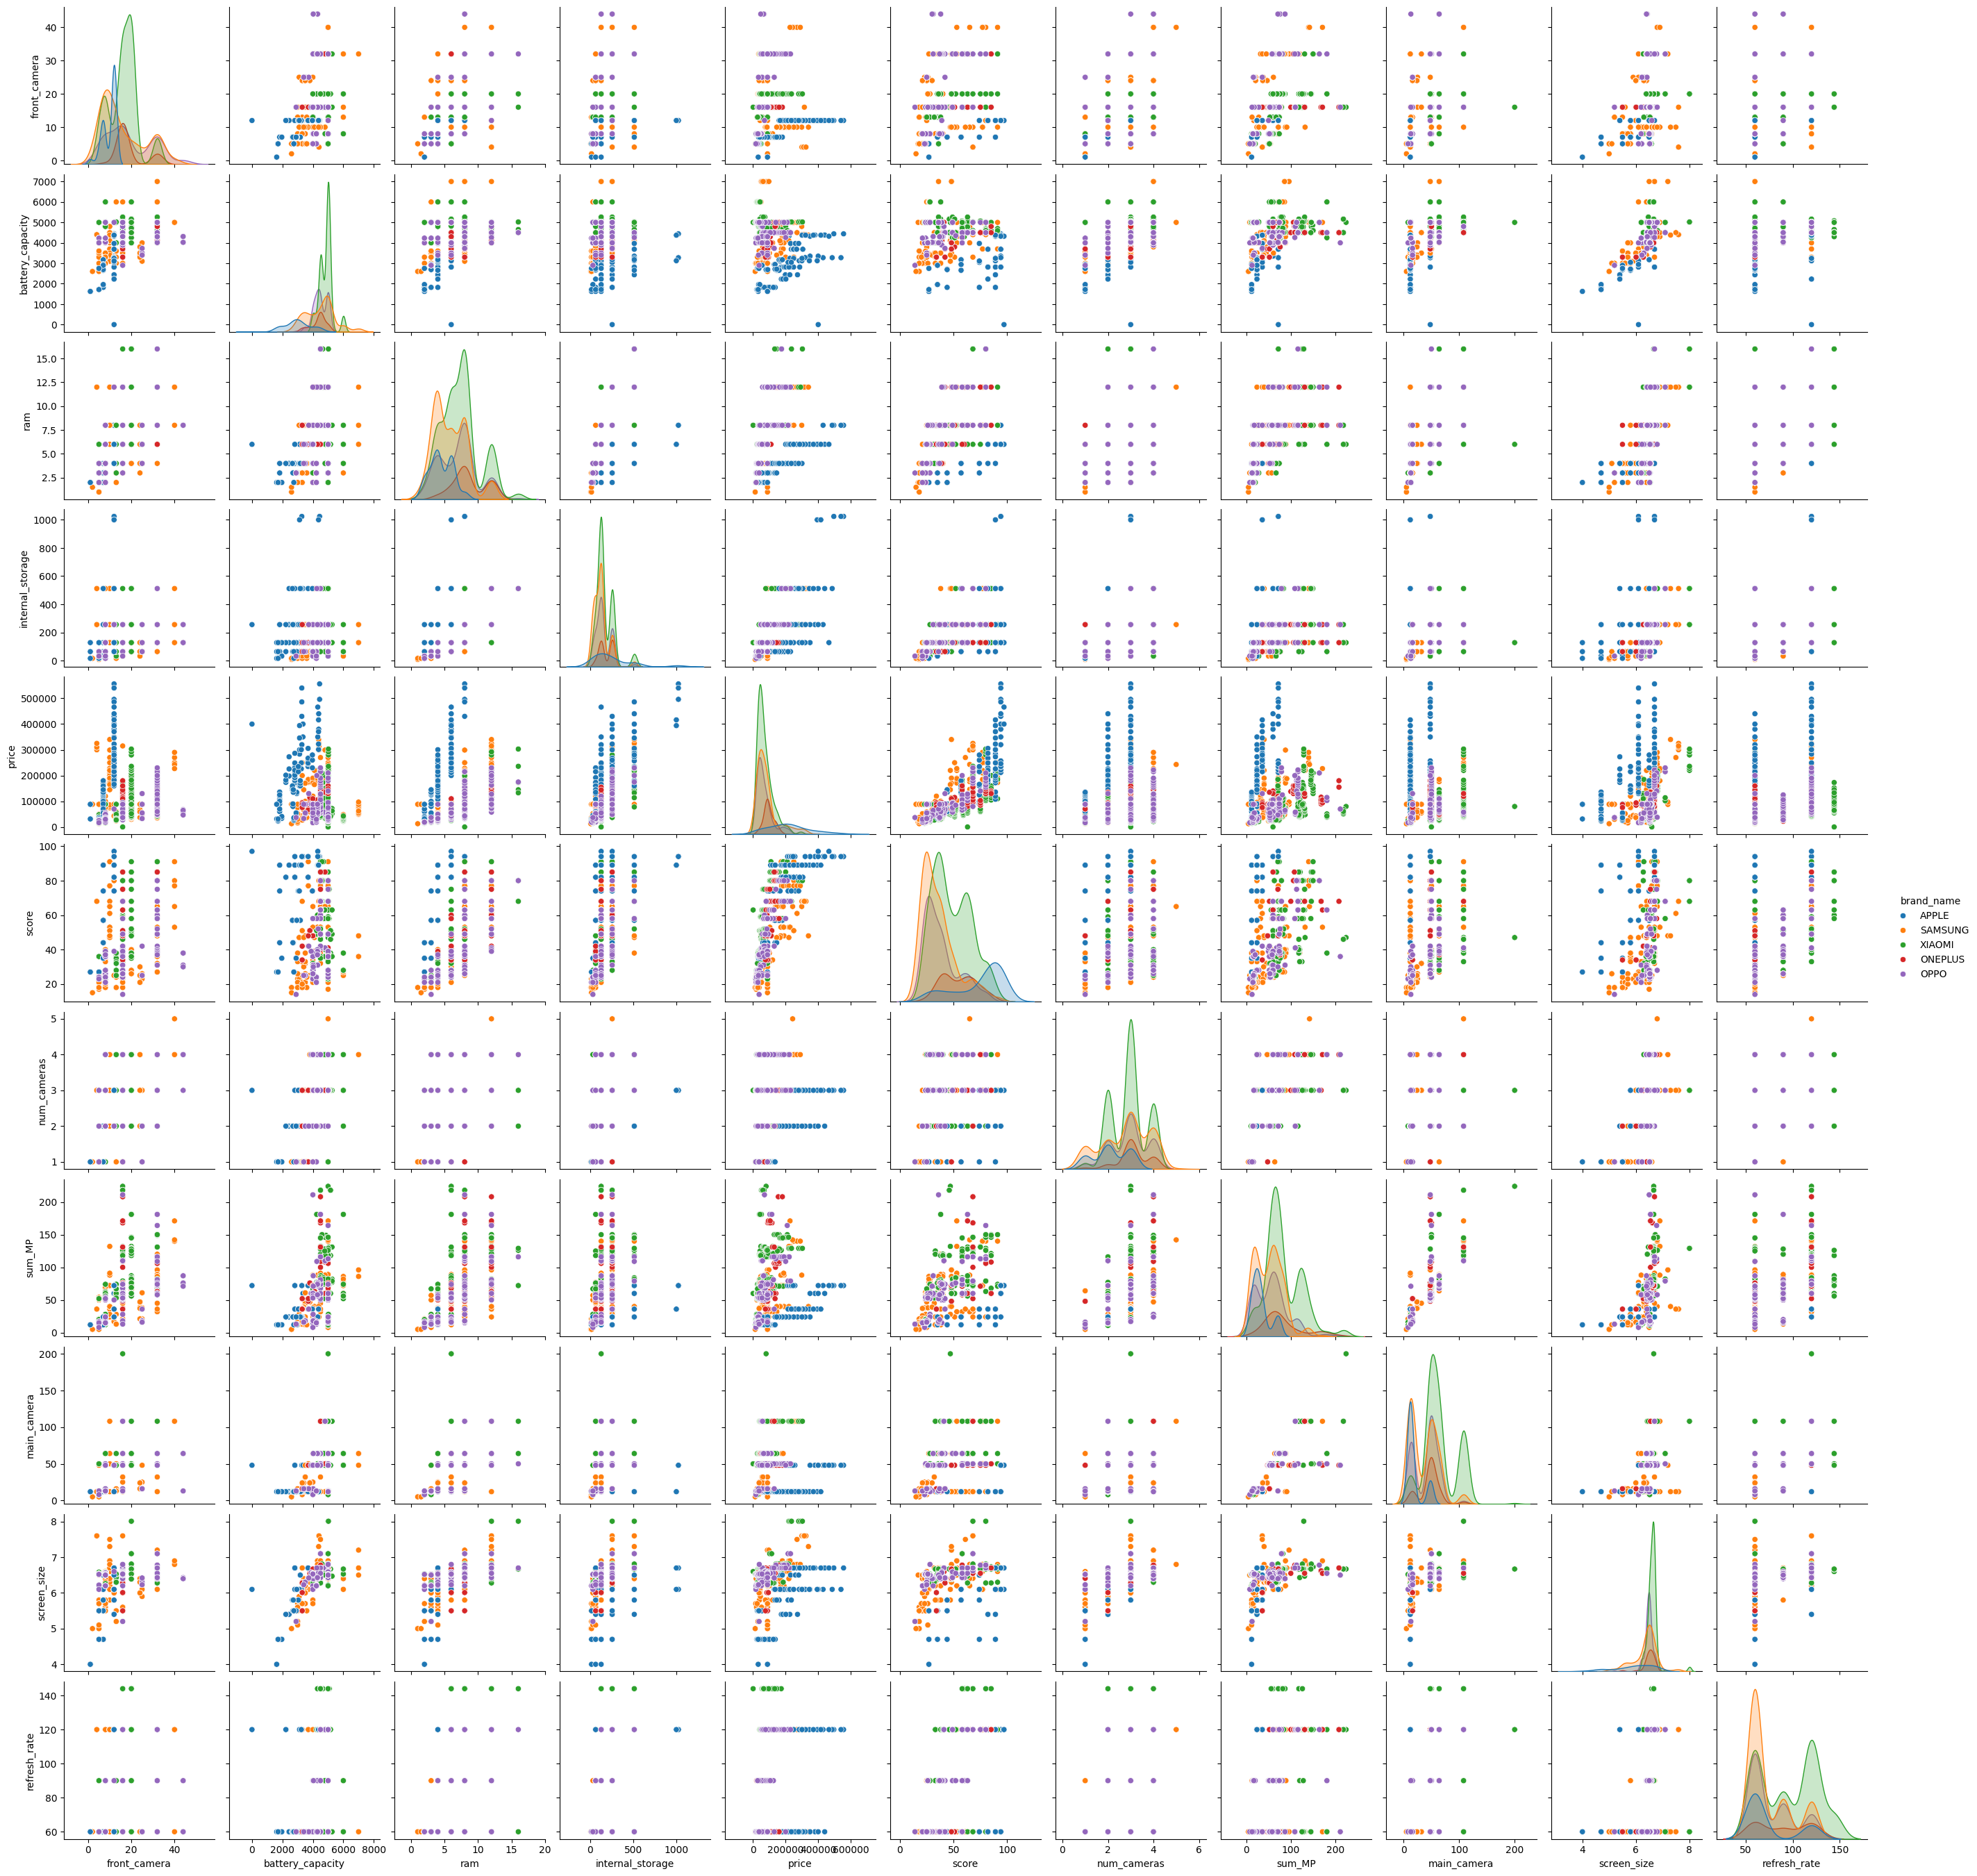

In [38]:
sns.pairplot(data = df, hue = 'brand_name')

Z powyższej macierzy można zauważyć, że marka APPLE charakteryzuje się mniejszymi pojemnościami baterii i trochę wyższą ceną niż pozostałe marki. Najprawdopodobniej jest to związane z użyciem przez nich własnego systemu operacyjnego, co może wskazywać na użycie osobnego modelu dla właśnie tych smartfonów. Również wśród produktów marki APPLE znajduje się najwięcje smartfonów o mniejszych rozmiarach ekranu.

## Macierz korelacji danych

<Axes: >

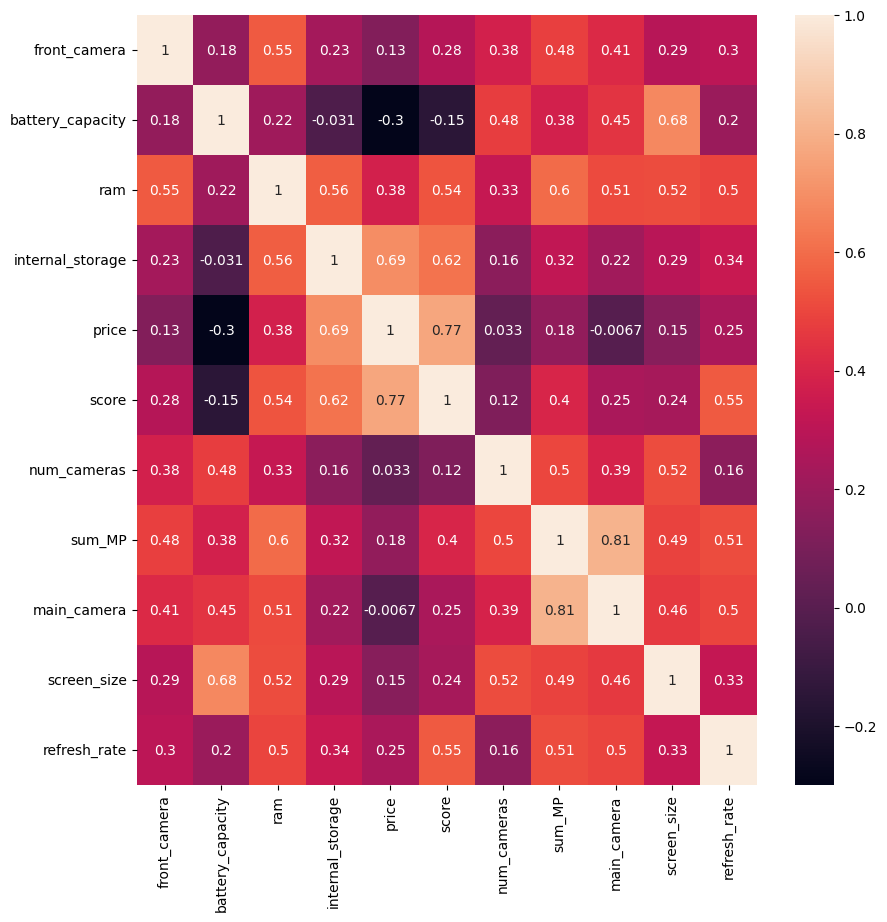

In [39]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

Największy wpływ na cenę ma punktacja na podstawie procesora, jest to mocna korelacja o wartości 0,78. Również dosyć dobrze skorelowane jest atrybut pamięci wewnętrznej, o wartości 0,6. Pozostałe atrybuty nie mają albo żadnego wpływu (korelacja bliska 0), lub bardzo mały wpływ. 
Poza tym najbradziej skorelowanymi ze sobą atrybutami są suma megapikseli i wartość megapikseli dla głównej kamery, ponieważ ta druga wartość stanowi składową pierwszej. Rozmiar ekranu i pojemność baterii również są mocno skorelowane, co jest związane z fizycznym rozmiarem urządzenia. Również ciekawym jest to, że cena i pojemność baterii jest ze sobą ujemnie skorelowana, jest to najprawdopodobniej powiązane z użyciem produktów Apple, które mają mniejszą pojemność baterii, a są widocznie droższe niż większość smartfonów z androidem.
Atrybut, który ma najmniejsza korelację są main_camera i num_cameras, są one bliskie 0. Pozostałymi atrybutami, których korelacja z ceną < 20, są: front_camera, sum_mp, screen_size.

W tym przypadku atrybutami, które jako jedyne mają wpływ są: *score*, *internal_storage*, oraz słaby wpływ: *ram*, *battery_capacity*

Z powodu na słabą korelację atrybutów między sobą i sugerowany wpływ różnic ze względu na smartfony firmy APPLE, myślę, że najlepszym sposobem do uzyskania dobrych rezultatów jest przeprowadzenie analizy jeszcze raz dla podziału na smartfony APPLE i resztę, czyli te z systemem Android

In [40]:
df_apple = df[df['brand_name'] == 'APPLE']
print('Ilość smartfonów z systemem iOS:     ', len(df_apple))
# zresetowanie indeksów
df_apple = df_apple.reset_index()
df_apple = df_apple.drop(columns = ['index'])


df_android = df[df['brand_name'] != 'APPLE']
print('Ilość smartfonów z systemem Android:', len(df_android))
# zresetowanie indeksów
df_android = df_android.reset_index()
df_android = df_android.drop(columns = ['index'])

Ilość smartfonów z systemem iOS:      91
Ilość smartfonów z systemem Android: 857


Po podziale zbiór smartfonów z iOS, jest około 9-10 razy mniejszy zbiór smartfonów z android.

Analiza dla smartfonów Android

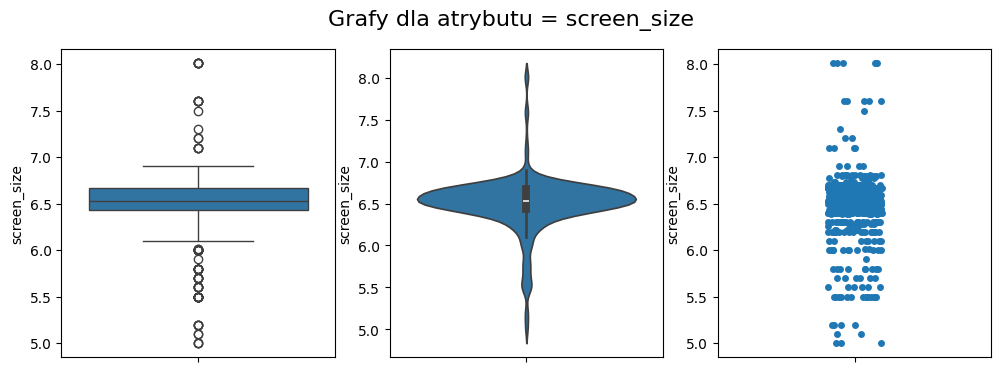

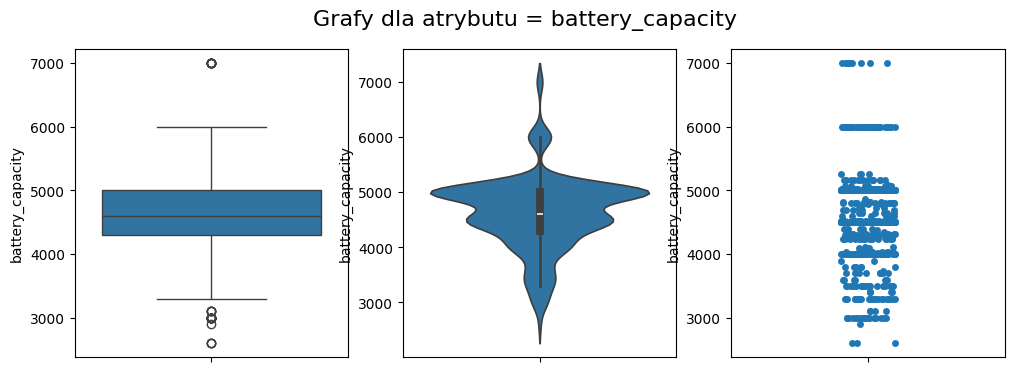

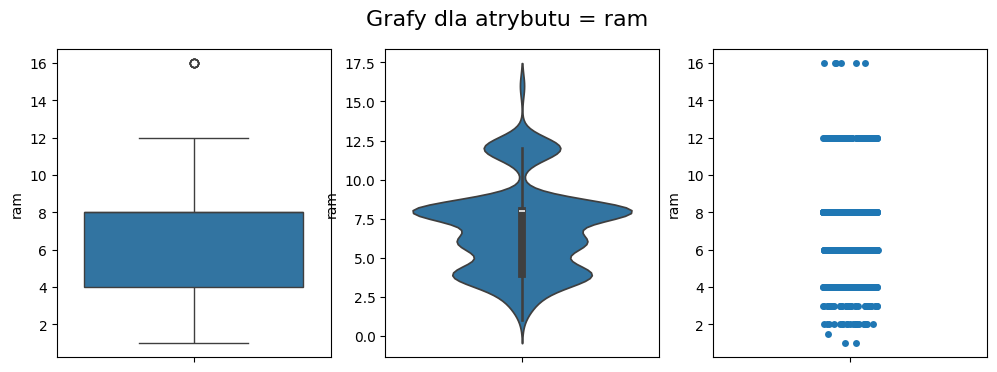

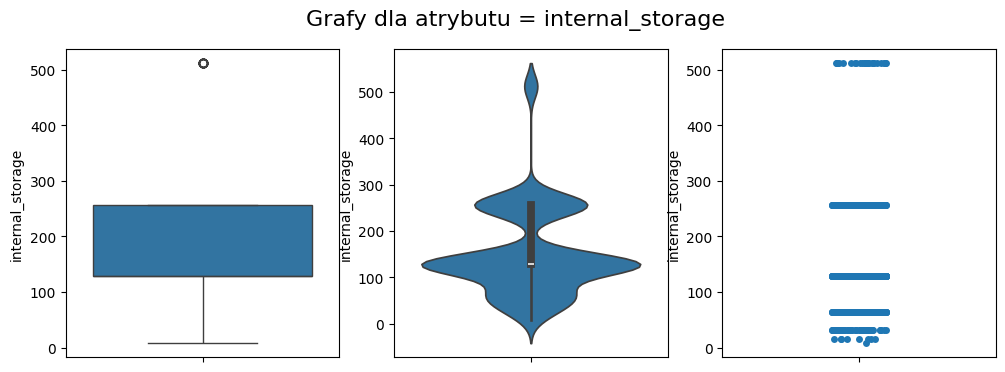

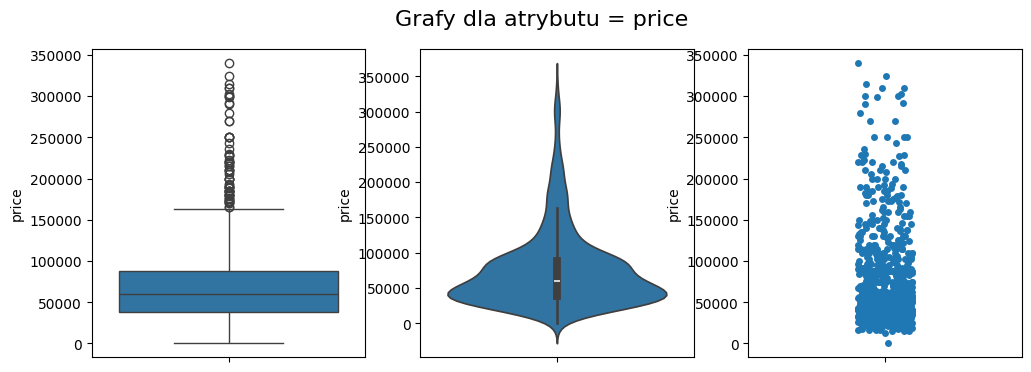

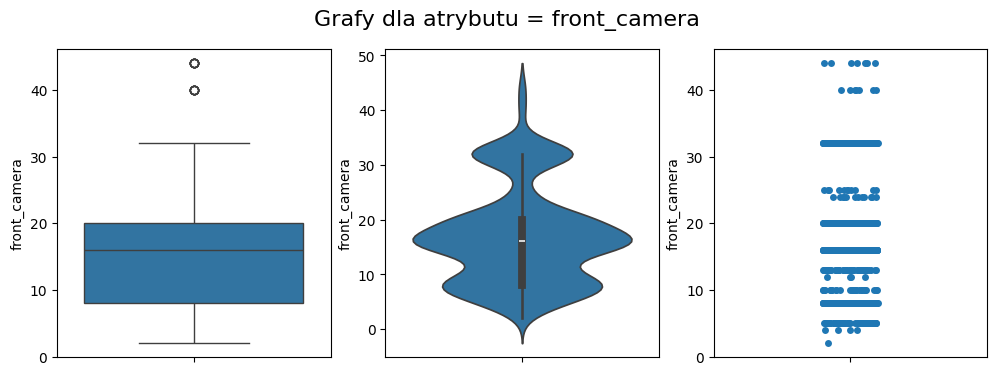

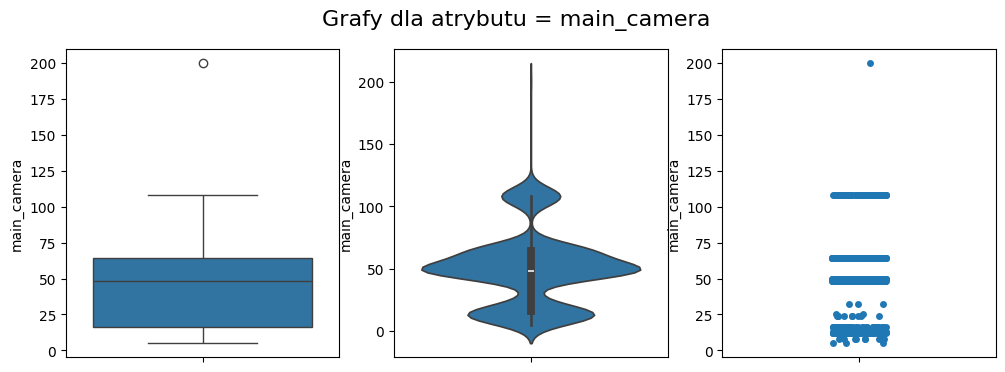

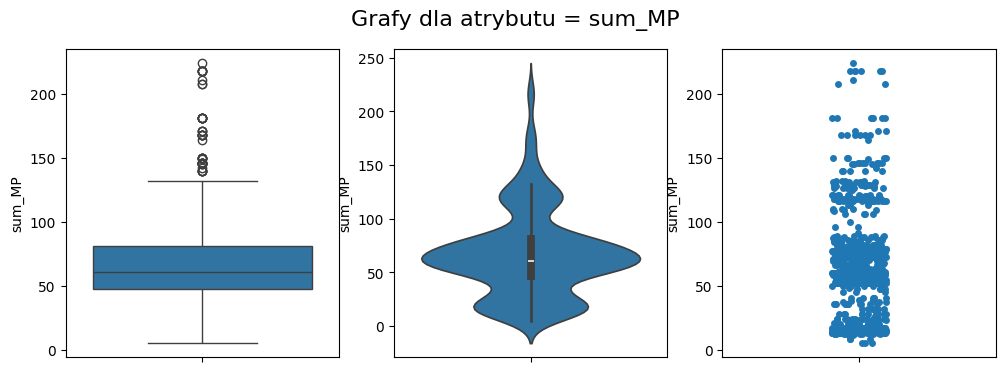

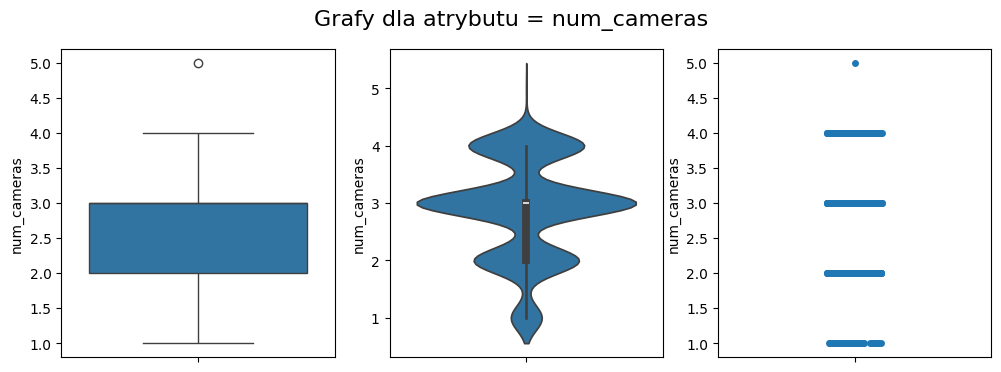

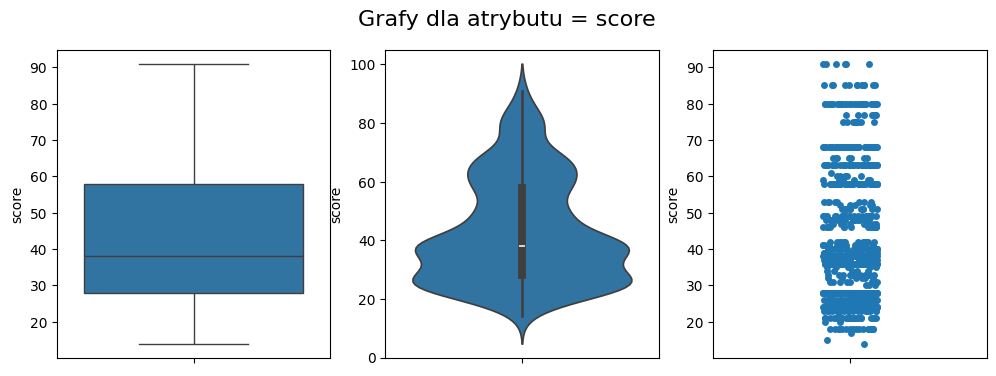

In [41]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df_android[attr]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary (Android)

In [42]:
android_description = df_android.describe()
android_description

front_camera  battery_capacity    ram  internal_storage      price  \
count        857.00            857.00 857.00            857.00     857.00   
mean          17.04          4,620.90   6.89            153.51  76,135.15   
std            8.84            664.14   2.80             96.04  55,107.84   
min            2.00          2,600.00   1.00              8.00     399.00   
25%            8.00          4,300.00   4.00            128.00  37,999.00   
50%           16.00          4,600.00   8.00            128.00  59,999.00   
75%           20.00          5,000.00   8.00            256.00  88,415.00   
max           44.00          7,000.00  16.00            512.00 339,999.00   

       score  num_cameras  sum_MP  main_camera  screen_size  refresh_rate  
count 857.00       857.00  857.00       857.00       857.00        857.00  
mean   43.14         2.89   67.53        49.57         6.50         85.37  
std    17.90         0.85   40.51        28.53         0.32         27.88  
min    14.00         1.00    5.00         5.00         5.00         60.00  
25%    28.00         2.00   47.00        16.00         6.43         60.00  
50%    38.00         3.00   61.00        48.00         6.53         90.00  
75%    58.00         3.00   81.00        64.00         6.67        120.00  
max    91.00         5.00  224.00       200.00         8.01        144.00

Współczynnik zmienności atrybutów

In [43]:
android_description.apply(calculate_coefficient_variation, axis = 0)

front_camera       0.52
battery_capacity   0.14
ram                0.41
internal_storage   0.63
price              0.72
score              0.42
num_cameras        0.29
sum_MP             0.60
main_camera        0.58
screen_size        0.05
refresh_rate       0.33
dtype: float64

Macierz korelacji

<Axes: >

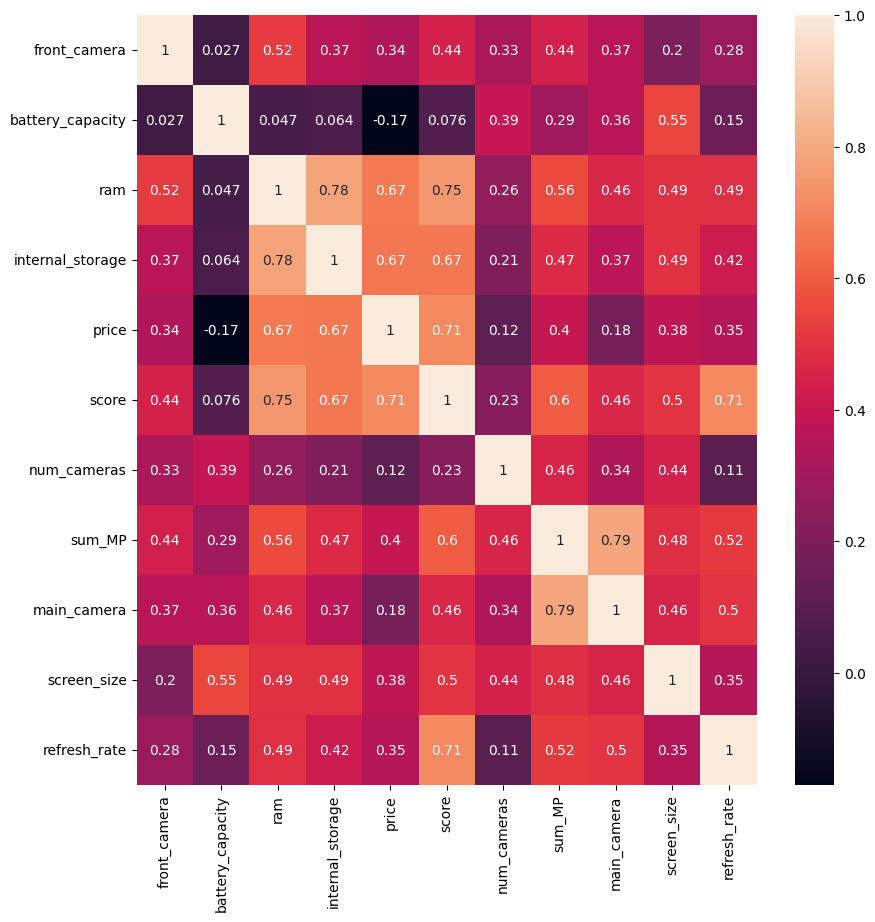

In [44]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df_android.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df_android.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

Atrybutami, które mają >= 60 korelację z ceną, są: ram, internal_storage, score. Z tych powyższych możemy użyć atrybutu score i internal_storage, bez atrybutu ram, ze względu na ich mocną korelację z atrybutem ram (0.75 i 0.78).

Pozostałe atrybuty są słabo skorelowane z ceną, przy czym atrybut num_cameras ma bardzo niską korelacje 0.11, przez co nie powinien praktycznie wpływać na rezultat. Najbardziej w zbiorze danych są ze sobą ponownie skorelowane są atrybuty sum_MP i main_camera. 

Dla smartfonów Apple

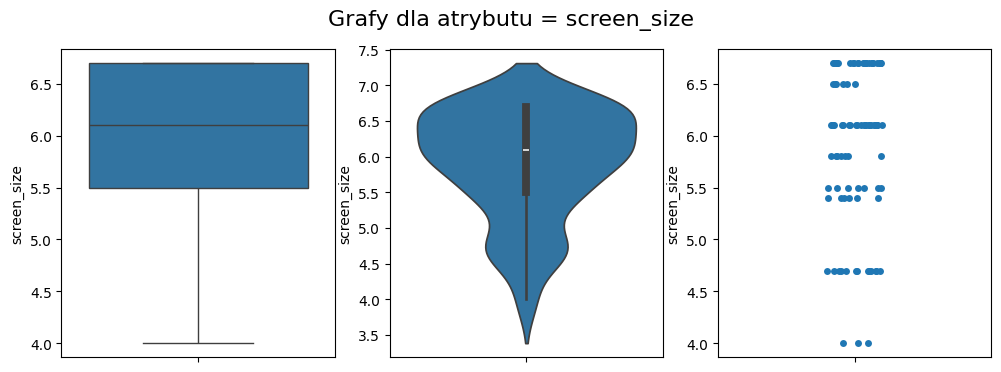

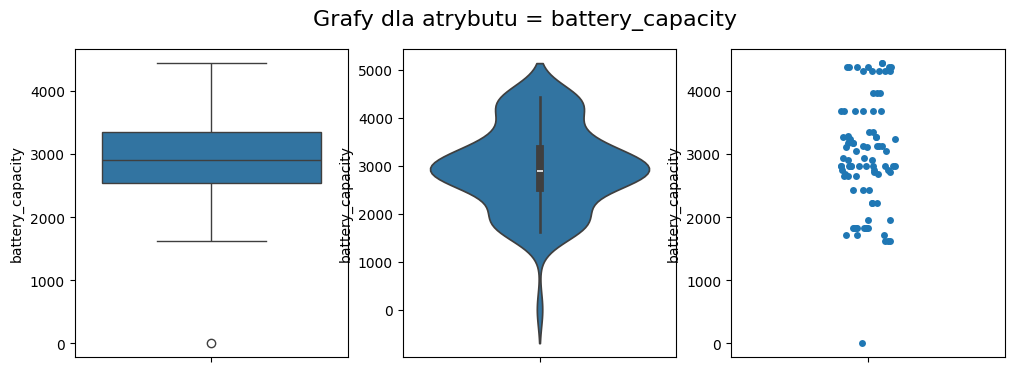

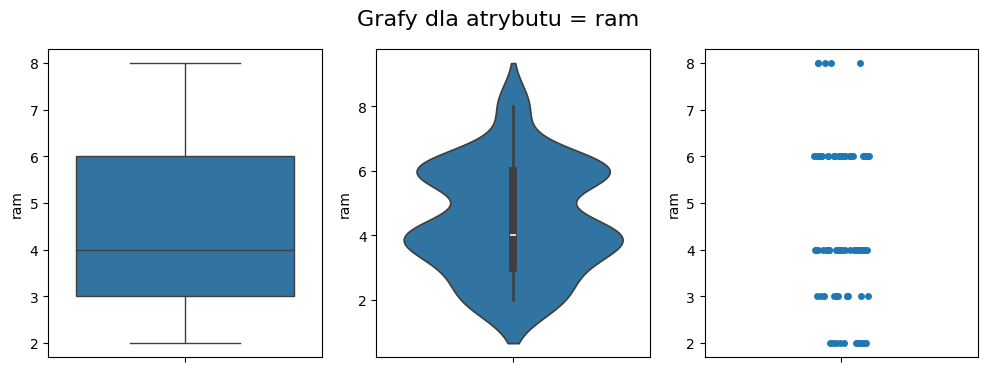

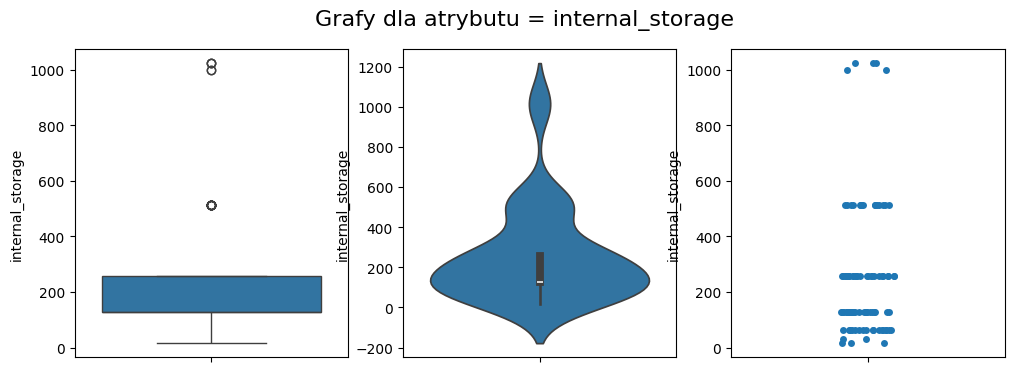

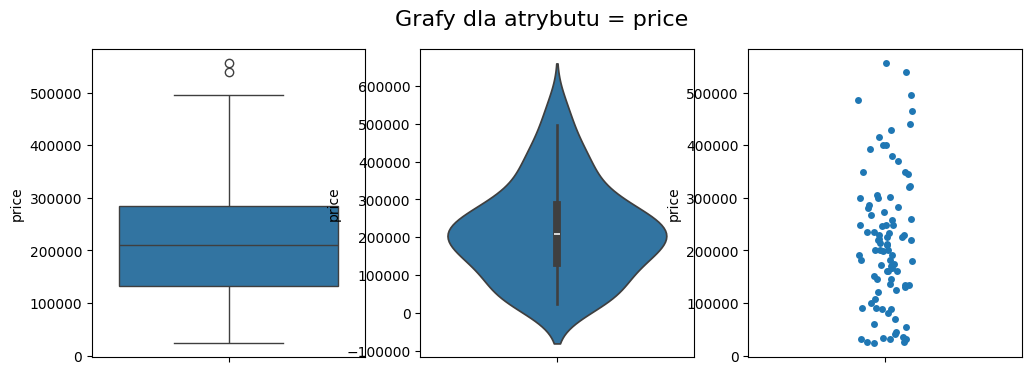

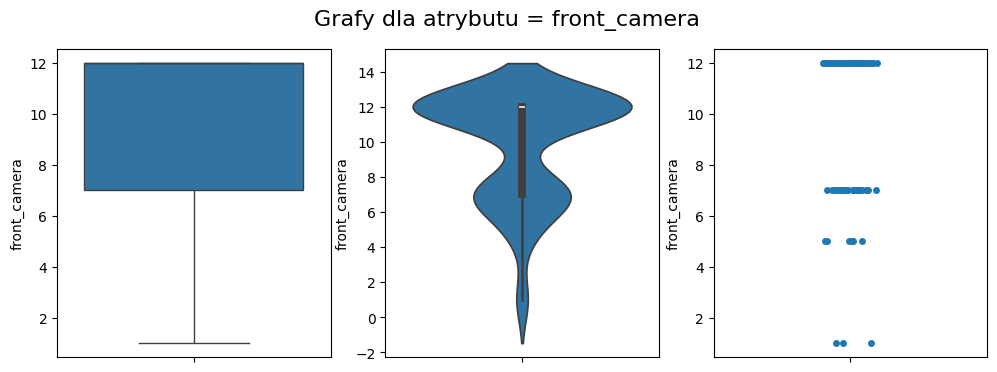

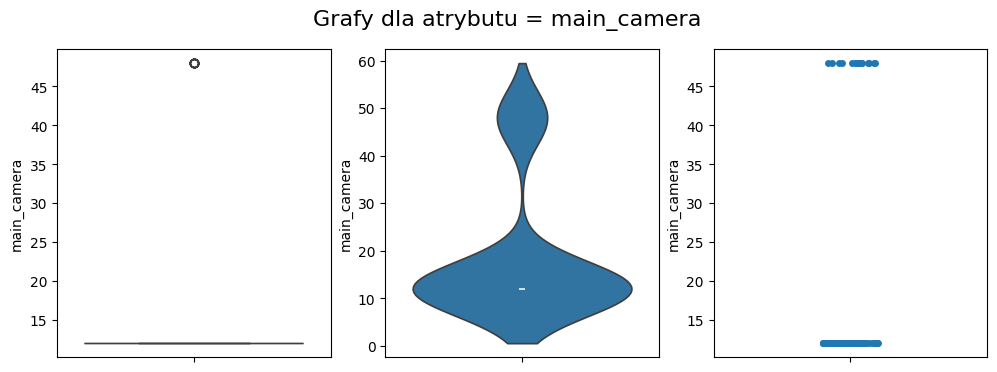

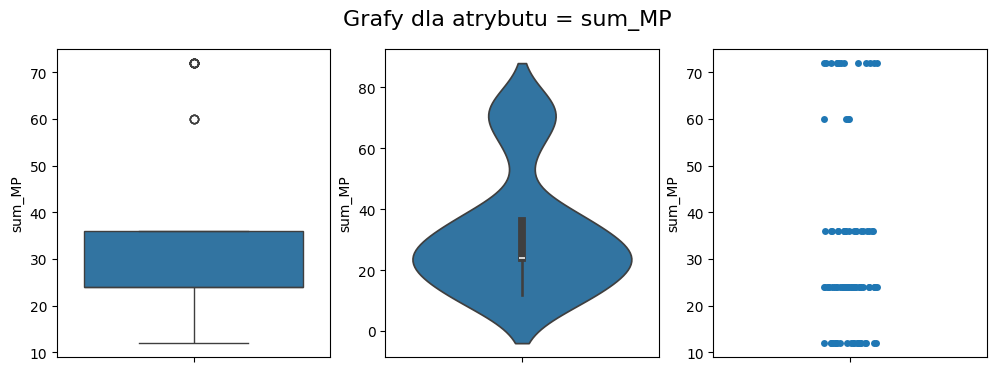

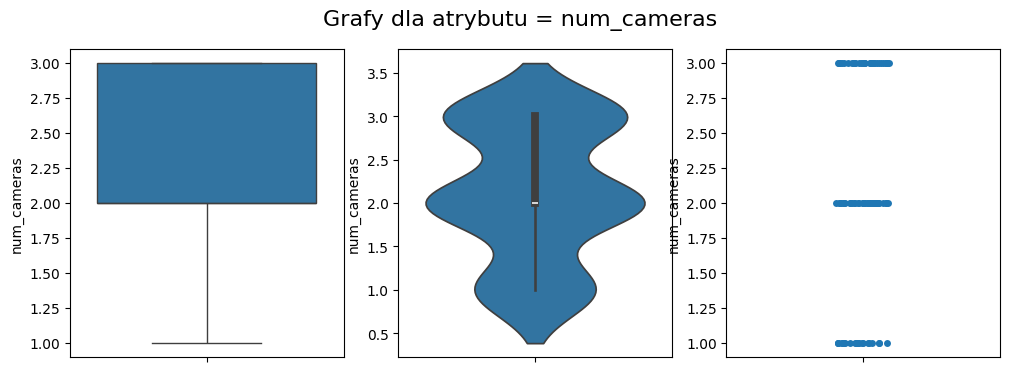

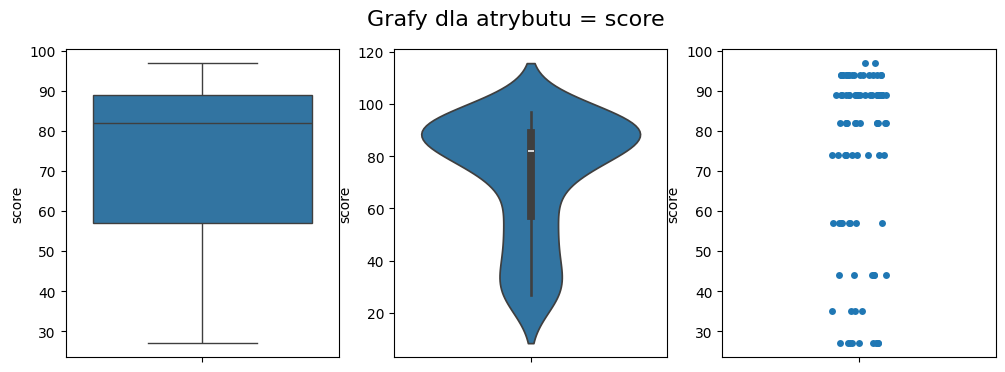

In [45]:
for attr in ['screen_size', 'battery_capacity', 'ram', 'internal_storage', 'price', 'front_camera', 'main_camera', 'sum_MP', 'num_cameras', 'score']:
    dane = df_apple[attr]
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Grafy dla atrybutu = {attr}', fontsize=16)
    
    plt.subplot(1, 3, 1)
    plt.xticks(ha='right')
    sns.boxplot(data=dane)
    
    plt.subplot(1, 3, 2)
    plt.xticks(ha='right')
    sns.violinplot(data=dane)
    
    plt.subplot(1, 3, 3)
    plt.xticks(ha='right')
    sns.stripplot(data=dane)
    
    plt.show()

## Standardowe miary (Apple)

In [46]:
apple_description = df_apple.describe()
apple_description

front_camera  battery_capacity   ram  internal_storage      price  \
count         91.00             91.00 91.00             91.00      91.00   
mean           9.86          2,963.10  4.49            257.41 217,071.08   
std            3.05            867.08  1.65            239.27 127,043.76   
min            1.00              3.00  2.00             16.00  22,999.00   
25%            7.00          2,548.00  3.00            128.00 132,499.00   
50%           12.00          2,900.00  4.00            128.00 209,999.00   
75%           12.00          3,349.00  6.00            256.00 284,900.00   
max           12.00          4,441.00  8.00          1,024.00 555,999.00   

       score  num_cameras  sum_MP  main_camera  screen_size  refresh_rate  
count  91.00        91.00   91.00        91.00        91.00         91.00  
mean   73.25         2.12   32.18        18.73         5.91         73.85  
std    22.96         0.76   19.67        14.11         0.76         25.42  
min    27.00         1.00   12.00        12.00         4.00         60.00  
25%    57.00         2.00   24.00        12.00         5.50         60.00  
50%    82.00         2.00   24.00        12.00         6.10         60.00  
75%    89.00         3.00   36.00        12.00         6.70         60.00  
max    97.00         3.00   72.00        48.00         6.70        120.00

Współczynnik zmienności atrybutów

In [47]:
apple_description.apply(calculate_coefficient_variation, axis = 0)

front_camera       0.31
battery_capacity   0.29
ram                0.37
internal_storage   0.93
price              0.59
score              0.31
num_cameras        0.36
sum_MP             0.61
main_camera        0.75
screen_size        0.13
refresh_rate       0.34
dtype: float64

<Axes: >

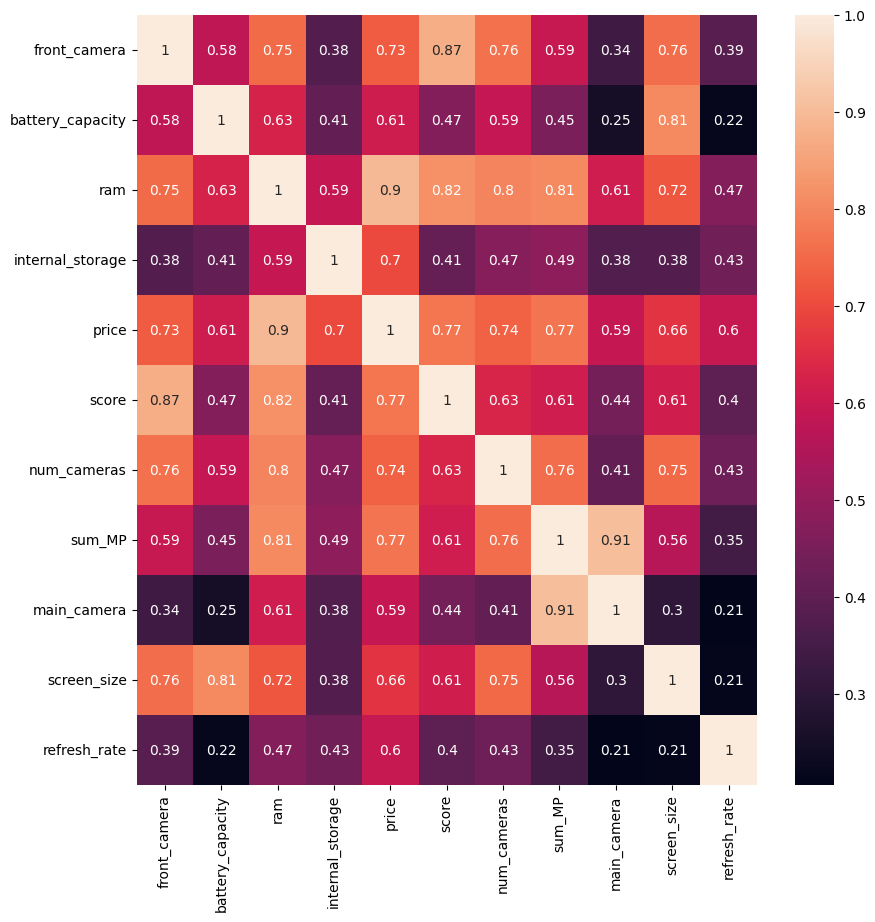

In [48]:
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(df_apple.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr(),annot = df_apple.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].corr())

W powyższej macierzy, korelację >= 0.6 z ceną, mają atrybutu: front_camera, battery_capacity, ram, score, num_cameras, sum_MP, screen_size. Ze wględu na mocną korelację niektórych z tych atrybutów z ram można w modelu regresji użyć atrybutów ram, battery_capacity, front_camera.

## Użycie regresji liniowej

In [49]:
def use_regression(df, attributes, dec_attribute, test_size, random = 0, min_max = False, standarization = False, stratify_arg = ""):
    ''' 
    parametry:
        df - ramka danych, która zostanie podzielona na dane uczące i testowe,
        dec_attribute - atrybut decyzujący,
        test_size - rozmiar zbioru testowego, liczba w przedziale (0.0, 1.0>,
        random - wartość seed random_state w funkcji train_test_split,
        max_min - jeżeli True dokonuje normalizacji min_max danych,
        standarization - jeżeli True dokonuje standaryzacji danych
        *uwaga jeżeli param

    zwraca:
        e_train - błąd uczenia,
        e_test - błąd generalizacji
    '''
    df_t = df.loc[:, attributes]

    if min_max == True and standarization == True:
        raise ValueError('Podano wartość min_max == True i standarization == True')

    if min_max == True:
        print('Wykonuję normalizację')
        scaler = MinMaxScaler()
        df_t = scaler.fit_transform(df_t)
    
    if standarization == True:
        print('Wykonuję standaryzację')
        scaler = StandardScaler()
        df_t = scaler.fit_transform(df_t)

    if stratify_arg == "":
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random)
    else:
        x_train, x_test, y_train, y_test = train_test_split(df_t, df[dec_attribute], test_size = test_size, random_state = random, stratify = df[stratify_arg])

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    e_train = metrics.mean_squared_error(y_train, y_pred_train)
    y_pred_test = model.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    
    return e_train, e_test

In [50]:
def plot_results(x, dokl_ucz, dokl_test, title, x_label):
    '''
    funkcja odpowiada za wizualizacje dokladnosci uczenia dla danych testowych i uczących
    
    parametry:
        x - dana rozdzielczość, dla której zebrane są dane uczenia
        dokl_ucz - wyniki dokladnosci, dla danych uczących
        dokl_test - wyniki dokladnosci, dla danych testowych
    '''
    plt.figure(dpi=100)
    plt.title(title)
    plt.plot(x, dokl_ucz, 'bo-', label = 'dane uczące')
    plt.xlabel(x_label)
    plt.ylabel('Błąd')
    plt.plot(x, dokl_test, 'ro-', label = 'dane testowe')
    plt.legend(loc='center right')
    plt.show()

Funkcja klasyfikująca do grup, w zależności od ceny. Jest ona wymagana przy użyciu stratify w funkcji train_test_split, aby podzielić dane testowe i treningowe w równych proporcjach co do ich wartości

In [51]:
def classify_based_on_price(row, bins):
    for i in range(len(bins)):
        if (row['price'] >= bins[i]):
            return i
    return -1                                # returns where there is an error

Wszystkie atrybuty numeryczne:

In [52]:
all_attributes = ['front_camera', 'battery_capacity', 'ram', 'internal_storage', 'score', 'num_cameras', 'sum_MP', 'main_camera', 'screen_size', 'refresh_rate']

### Dla całego zbioru danych, bez podziału

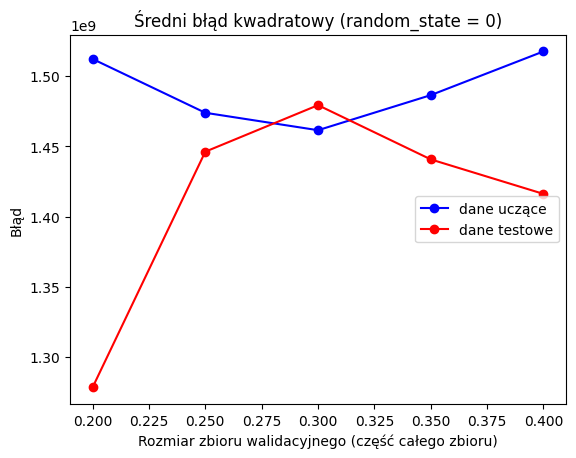

Minimalny błąd dla zbioru testowego = 1278390738.9065156 dla rozmiaru danych testowych = 0.2


In [53]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Proporcjonalny podział danych testowych i uczących

In [54]:
samples_per_bin, bins = np.histogram(df['price'], bins='doane')
bins = bins[:-5]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

df['classification'] = df.apply(classify_based_on_price, axis = 1, args = [bins])

[e_train, e_test] = use_regression(df, all_attributes, 'price', 0.2, stratify_arg = 'classification')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Błąd uczenia:       1502343624.5373244
Błąd generalizacji: 1291789927.9260237


Nie poprawiło to rezultatów błędu generalizacji

Wybór parametru random

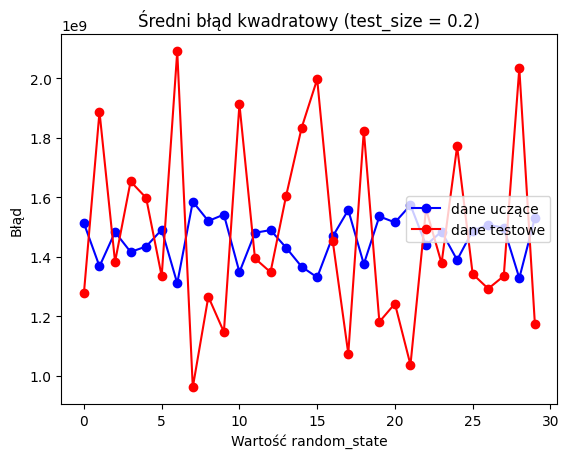

Minimalny błąd dla zbioru testowego = 960677136.3914217 dla wartości random_state = 7


In [55]:
r = range(30)
error_train = []
error_test = []
for random in range(30):
    [e_train, e_test] = use_regression(df, all_attributes, 'price', 0.2, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

test_size = 0.2

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

In [56]:
print('Normalizacja Min-Max')
[e_train_norm, e_test_norm] = use_regression(df, all_attributes, 'price', 0.2, random = 7, min_max = True)
print('Błąd uczenia      ', e_train_norm)
print('Błąd generalizacji', e_test_norm)
print()

print('Standaryzacja')
[e_train_stand, e_test_stand] = use_regression(df, all_attributes, 'price', 0.2, random = 7, standarization = True)
print('Błąd uczenia      ', e_train_stand)
print('Błąd generalizacji', e_test_stand)

Normalizacja Min-Max
Wykonuję normalizację
Błąd uczenia       1585206881.1838653
Błąd generalizacji 960677136.3914188

Standaryzacja
Wykonuję standaryzację
Błąd uczenia       1585206881.1838648
Błąd generalizacji 960677136.391422


Zarówno normalizacja Min-Max, jak i standaryzacja nie dają lepszych rezultatów.

### Apple

Wybranie parametru test_size, do jak najlepszego podziału zbioru

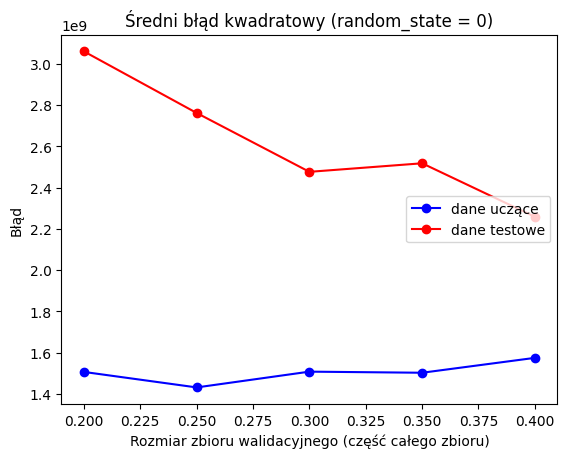

Minimalny błąd dla zbioru testowego = 2259059572.363845 dla rozmiaru danych testowych = 0.4


In [57]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df_apple, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Proporcjonalny podział danych testowych i uczących

In [58]:
samples_per_bin, bins = np.histogram(df_apple['price'], bins='doane')
bins = bins[:-2]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

df_apple['classification'] = df_apple.apply(classify_based_on_price, axis = 1, args = [bins])

[e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, stratify_arg = 'classification')
print('Błąd uczenia:      ', e_train)
print('Błąd generalizacji:', e_test)

Błąd uczenia:       1461098666.5551379
Błąd generalizacji: 2227542856.28785


Proporcjonalny podział danych praktycznie nie poprawił wyniku błędu generalizacji

Wybranie parametru random

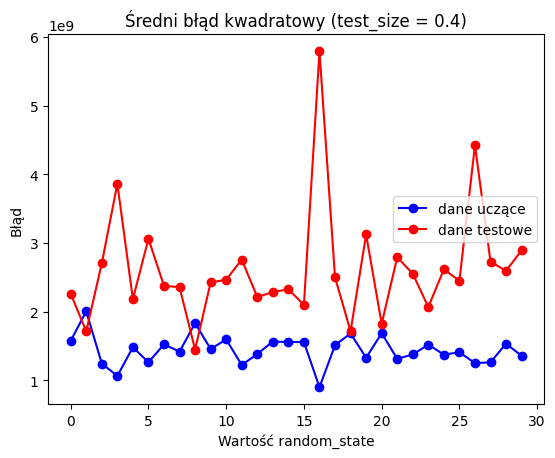

Minimalny błąd dla zbioru testowego = 1447671373.44209 dla wartości random_state = 8


In [59]:
r = range(30)
error_train = []
error_test = []
for random in range(30):
    [e_train, e_test] = use_regression(df_apple, all_attributes, 'price', 0.4, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

test_size = 0.4

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

In [60]:
print('Normalizacja Min-Max')
[e_train_apple_norm, e_test_apple_norm] = use_regression(df_apple, all_attributes, 'price', 0.4, random = 8, min_max = True)
print('Błąd uczenia      ', e_train_apple_norm)
print('Błąd generalizacji', e_test_apple_norm)
print()

print('Standaryzacja')
[e_train_apple_stand, e_test_apple_stand] = use_regression(df_apple, all_attributes, 'price', 0.4, random = 8, standarization = True)
print('Błąd uczenia      ', e_train_apple_stand)
print('Błąd generalizacji', e_test_apple_stand)

Normalizacja Min-Max
Wykonuję normalizację
Błąd uczenia       1831581017.2893655
Błąd generalizacji 1447671373.4420555

Standaryzacja
Wykonuję standaryzację
Błąd uczenia       1831581017.2893665
Błąd generalizacji 1447671373.4420562


Zarówno normalizacja Min-Max, jak i standaryzacja nie dały lepszych rezultatów.

### Android

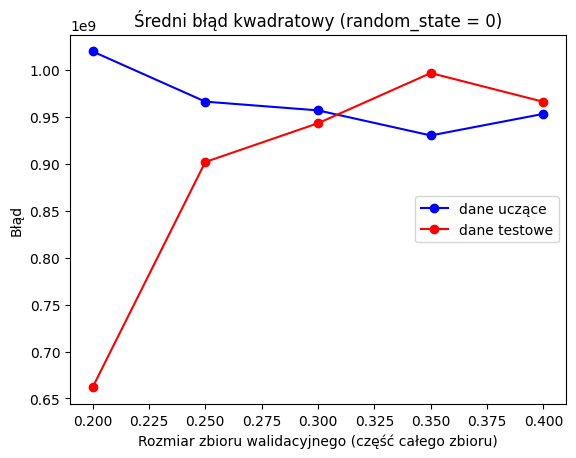

Minimalny błąd dla zbioru testowego = 661754457.590953 dla rozmiaru danych testowych = 0.2


In [61]:
error_train = []
error_test = []
test_size = [0.2, 0.25, 0.3, 0.35, 0.4]
for size in test_size:
    [e_train, e_test] = use_regression(df_android, all_attributes, 'price', size)
    error_train.append(e_train)
    error_test.append(e_test)

random = 0

title = 'Średni błąd kwadratowy (random_state = ' + str(random) + ')'
x_label = 'Rozmiar zbioru walidacyjnego (część całego zbioru)'
plot_results(test_size, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla rozmiaru danych testowych =', test_size[error_test.index(min(error_test))])

Dokonanie proporcjonalnego podziału zbioru danych uczących i testowych

In [62]:
samples_per_bin, bins = np.histogram(df_android['price'], bins='doane')
bins = bins[:-1]   # aby pozbyć się jednoosobowej grupy
bins = bins[::-1]  # odwrócenie wartości w liście

df_android['classification'] = df_android.apply(classify_based_on_price, axis = 1, args = [bins])

[e_train, e_test] = use_regression(df_android, all_attributes, 'price', 0.2, stratify_arg = 'classification')
print(e_train)
print(e_test)

990752698.967503
791907037.2283602


Dzięki proporcjonalnemu podziałowi błąd generalizacji nie zmniejszył się

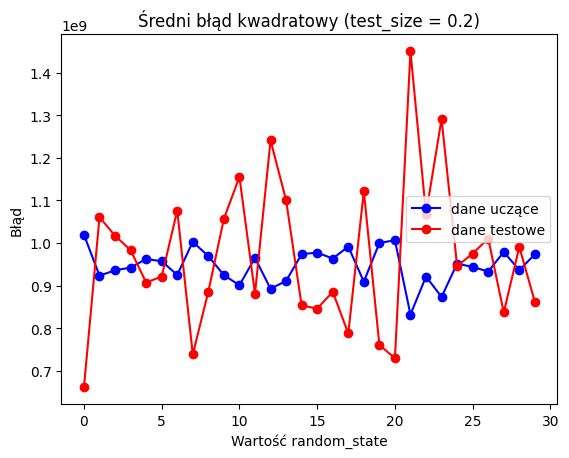

Minimalny błąd dla zbioru testowego = 661754457.590953 dla wartości random_state = 0


In [63]:
r = range(30)
error_train = []
error_test = []
test_size = 0.2
for random in r:
    [e_train, e_test] = use_regression(df_android, all_attributes, 'price', test_size, random = random)
    error_train.append(e_train)
    error_test.append(e_test)

title = 'Średni błąd kwadratowy (test_size = ' + str(test_size) + ')'
x_label = 'Wartość random_state'
plot_results(r, error_train, error_test, title, x_label)
print('Minimalny błąd dla zbioru testowego =', min(error_test), 'dla wartości random_state =', r[error_test.index(min(error_test))])

Jednak dzięki wykorzystaniu innej wartości random_state przy podziale udało się jeszcze bardziej zmniejszyć wartość błędu.

Sprawdzenie zmiany względem normalizacji min-max i standaryzacji danych:

In [64]:
print('Normalizacja Min-Max')
[e_train_android_norm, e_test_android_norm] = use_regression(df_android, all_attributes, 'price', 0.2, random = 0, min_max = True)
print('Błąd uczenia      ', e_train_android_norm)
print('Błąd generalizacji', e_test_android_norm)
print()

print('Standaryzacja')
[e_train_android_stand, e_test_android_stand] = use_regression(df_android, all_attributes, 'price', 0.2, random = 0, standarization = True)
print('Błąd uczenia      ', e_train_android_stand)
print('Błąd generalizacji', e_test_android_stand)

Normalizacja Min-Max
Wykonuję normalizację
Błąd uczenia       1019806307.6880887
Błąd generalizacji 661754457.5909523

Standaryzacja
Wykonuję standaryzację
Błąd uczenia       1019806307.6880884
Błąd generalizacji 661754457.5909526


Zarówno normalizacja Min-Max, jak i standaryzacja danych nie dały lepszych rezultatów

### Przeliczenie w celu porównania rozdzielenia zbioru danych

In [65]:
test_error         = 960677136.3914217
apple_test_error   = 1447671373.44209
android_test_error = 661754457.590953

n_apple = len(df_apple)
n_android = len(df_android)
test_error_splitted = (n_apple*apple_test_error + n_android*android_test_error)/(n_apple + n_android)
print('Całkowity błąd przy rozdzieleniu danych', test_error_splitted)
print('Jest on o', 1 - test_error_splitted/test_error, '% mniejszy od błędu przed rozdzieleniem danych')

Całkowity błąd przy rozdzieleniu danych 737195849.3024018
Jest on o 0.23262892247907507 % mniejszy od błędu przed rozdzieleniem danych


Jak można zauważyć rozdzielenie danych na dwa zbiory, w zależnosci od systemu operacyjnego było dobrym rozwiązaniem